<a href="https://colab.research.google.com/github/timluis/ds4geo_MainProject/blob/main/Notebooks/Artifical_snow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install geopanda, rtree and descartes
# this is a workaround which is only requierd in google colab 
# more information on this issue: https://github.com/geopandas/geopandas/issues/901

#!apt update
#!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes
!pip install rasterio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show

In [3]:
#define functions
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

def RGBnorm(raster):
    """Returns a raster with RGB color normalized
    raster: rasterio DatasetReader"""
    color_dict = {color.name:raster.read(n+1) for n,color in enumerate(raster.colorinterp)}
    for k,v in color_dict.items():
      color_dict[k] = normalize(v)
    rgb =  np.dstack(tuple(v for v in color_dict.values()))
    rgb=rasterio.plot.reshape_as_raster(rgb)
    return rgb


In [4]:
# load ski resort area as shapefile, boundary of tyrol as shapefile and the ski runs as a shape file
ski_areas = gpd.read_file('https://services3.arcgis.com/hG7UfxX49PQ8XkXh/arcgis/rest/services/URP_Schigebietsgrenzen/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
tyrol = gpd.read_file('https://nextcloud.bev.gv.at/nextcloud/index.php/s/Em37fLr8B4jbrxM/download')
ski_runs = gpd.read_file('http://tiles.skimap.org/geojson/runs.geojson')
# drop everything outside of europe to reduce the data size
ski_runs=ski_runs.loc[ski_runs.convention=='europe']
# drop every slope which is not in a ski area (there are a lot of ski touring routes in the dataset which we don't need)
ski_runs = gpd.sjoin(ski_runs,ski_areas,how='inner',op='within')

In [5]:
tyrol_regions = tyrol.dissolve(by='GB')
#tyrol_regions = gpd.GeoDataFrame(tyrol_regions.geometry.to_crs(ski_areas.crs))

In [297]:
rgb=RGBnorm(NDSI)

In [257]:
ski_runs = gpd.sjoin(ski_runs,ski_areas,how='inner',op='within')

In [108]:
NDSI = rasterio.open('/content/2020-11-29-00_00_2020-11-29-23_59_Sentinel-2_L2A_NDSI (1).tiff')

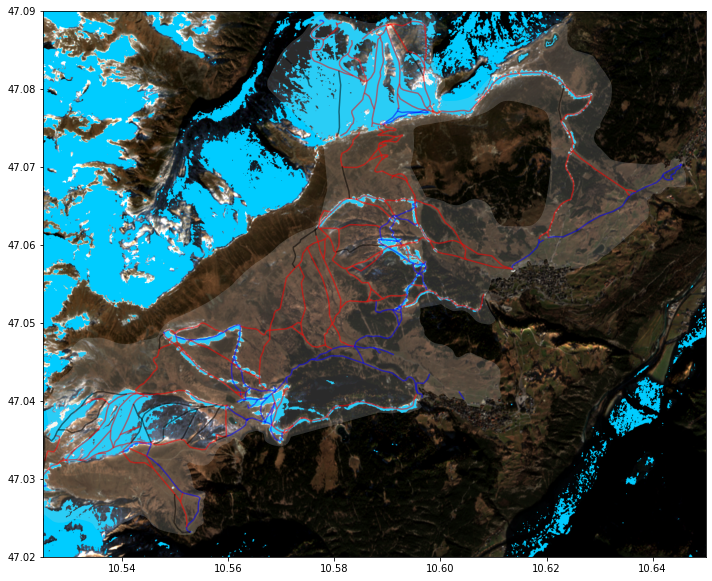

In [312]:
fig, ax = plt.subplots(figsize=(10,10))



show(rgb,transform=NDSI.transform,ax=ax)
ski_areas.loc[ski_areas.NAME == 'Komperdell'].plot(ax=ax,color='lightgrey',edgecolor='None',alpha=0.2)
for col in ['blue','red','black']:
  ski_runs.loc[ski_runs.colorName == col].plot(ax=ax,color=col,alpha=0.5)

ax.set_xlim(10.525,10.65)
ax.set_ylim(47.02,47.09)
plt.tight_layout()

In [313]:
pip install sentinelsat

In [314]:
from sentinelsat import SentinelAPI

In [ ]:
user = 'timphilipp'
password = 'conrad94Lone'
api = SentinelAPI(user,password,'https://scihub.copernicus.eu/dhus')

In [323]:
footprint=ski_areas.loc[ski_areas.NAME == 'Komperdell'].geometry

In [398]:
for i in ski_areas.loc[ski_areas.NAME == 'Komperdell'].geometry:
    footprint = i
footprint=footprint.simplify(10000)

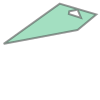

In [387]:
for i in tyrol_regions.loc[tyrol_regions.index == 'Landeck'].geometry:
  footprint=i
footprint=footprint.simplify(10000)

In [436]:
product = api.query(footprint.to_wkt(),
                    date=('20161101','20161231'),
                    platformname='Sentinel-2',
                    processinglevel='Level-2A',
                    cloudcoverpercentage=(0,30)
                    )

In [437]:
products_gdf = api.to_geodataframe(product)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/sentinelsat/sentinel.py:469: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  return gpd.GeoDataFrame(crs=crs)


In [438]:
products_gdf

""


In [428]:
api.is_online('dcbf5517-fce5-44ad-9bfa-1da761a12055')

True

In [444]:
blue = rgb[2]

In [447]:
test = np.where(rgb[2]==1,1,0)

In [449]:
test.shape

(1391, 1735)

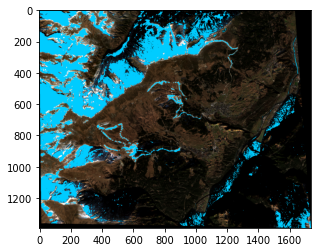

In [451]:
show(rgb)

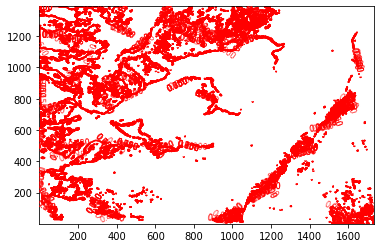

In [452]:
show(test,contour=True)